<a href="https://colab.research.google.com/github/guybrush1989/DMT-Group80/blob/par05_8_0_0/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/Group 80 - DTM/assignment1/dataset_mood_smartphone.csv")

print(data)

        Unnamed: 0       id                     time        variable   value
0                1  AS14.01  2014-02-26 13:00:00.000            mood   6.000
1                2  AS14.01  2014-02-26 15:00:00.000            mood   6.000
2                3  AS14.01  2014-02-26 18:00:00.000            mood   6.000
3                4  AS14.01  2014-02-26 21:00:00.000            mood   7.000
4                5  AS14.01  2014-02-27 09:00:00.000            mood   6.000
...            ...      ...                      ...             ...     ...
376907     2770399  AS14.30  2014-04-11 07:51:16.948  appCat.weather   8.032
376908     2772465  AS14.30  2014-04-19 11:00:32.747  appCat.weather   3.008
376909     2774026  AS14.30  2014-04-26 10:19:07.434  appCat.weather   7.026
376910     2774133  AS14.30  2014-04-27 00:44:48.450  appCat.weather  23.033
376911     2784435  AS14.32  2014-04-07 18:25:14.036  appCat.weather  22.431

[376912 rows x 5 columns]


In [3]:
data.id.unique()

array(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'], dtype=object)

In [0]:
# user1 = data[data['id'] == "AS14.01"]
# user1_mood = user1[user1["variable"] == "mood"]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


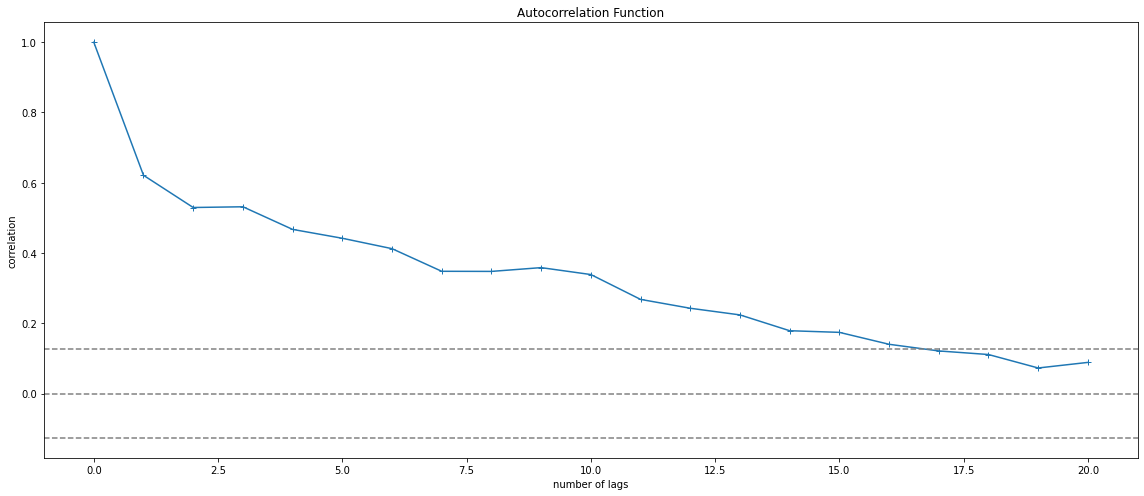

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas import DataFrame

user = data[data['id'] == "AS14.05"]
user_mood = user[user["variable"] == "mood"]

avgs = []

moods = list(user_mood["value"])

lag_acf = acf(moods, nlags=20)
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_acf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(moods)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(moods)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

In [0]:
lag_acf

array([ 1.        ,  0.35384547,  0.29597403,  0.17145398,  0.30134206,
        0.18274967,  0.09427704,  0.10112847,  0.11839093,  0.16481027,
        0.16973597,  0.04569735, -0.00224451,  0.0565116 ,  0.06191873,
        0.0500243 ,  0.02179118,  0.03360741,  0.02171298,  0.07950622,
        0.09132245,  0.08487425,  0.03693239,  0.03641186,  0.08379407,
        0.04129845,  0.07089767,  0.05259414,  0.159253  ,  0.17010636,
        0.12809217,  0.05099343,  0.09789421,  0.08055355,  0.09781601,
       -0.00347482,  0.03846116,  0.12733703,  0.06064931, -0.05345972,
       -0.11822169, -0.05353792, -0.07136001, -0.09510977, -0.08329354,
       -0.08974175, -0.06062396, -0.0433615 , -0.03202671, -0.10912545,
       -0.08449102])

ERROR! Session/line number was not unique in database. History logging moved to new session 59


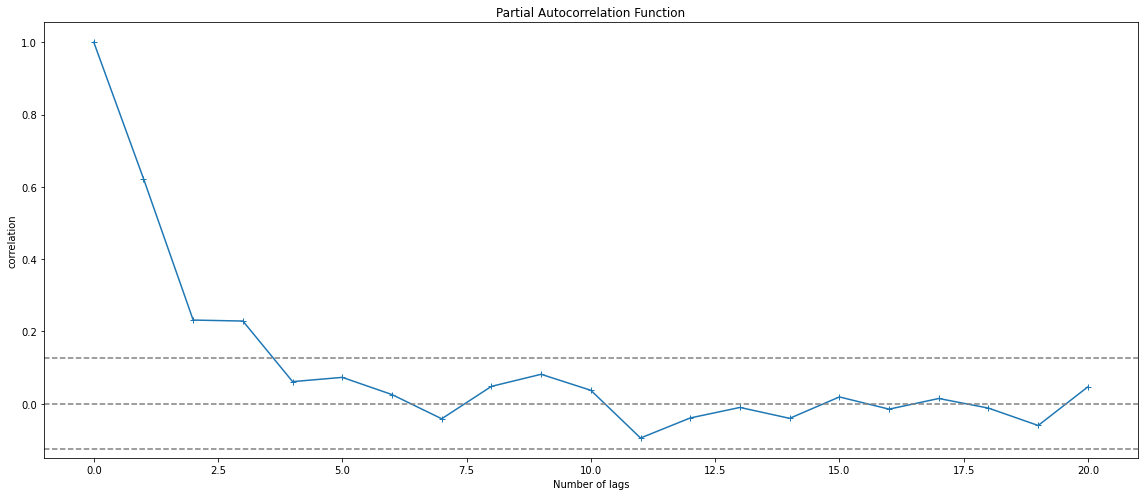

In [18]:
#calling partial correlation function
lag_pacf = pacf(moods, nlags=20, method='ols')
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(moods)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(moods)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()

In [0]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(moods, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=532.511, BIC=539.078, Time=0.047 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=508.290, BIC=518.140, Time=0.066 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=516.791, BIC=526.640, Time=0.045 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=1326.645, BIC=1329.928, Time=0.008 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=502.505, BIC=515.638, Time=0.185 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=504.430, BIC=520.846, Time=0.223 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=501.618, BIC=518.034, Time=0.476 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=499.615, BIC=512.748, Time=0.504 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=501.526, BIC=517.942, Time=0.526 seconds
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=506.470, BIC=519.603, Time=0.075 se

In [6]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 3.3MB/s 


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  221
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -240.936
Method:                       css-mle   S.D. of innovations              0.712
Date:                Fri, 03 Apr 2020   AIC                            497.872
Time:                        10:22:26   BIC                            525.057
Sample:                             1   HQIC                           508.849
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0065      0.001      5.531      0.000       0.004       0.009
ar.L1.D.y      0.1963      0.067      2.923      0.004       0.065       0.328
ar.L2.D.y      0.1429      0.068      2.095      0.0

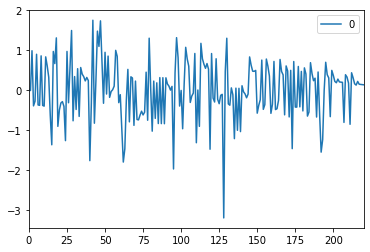

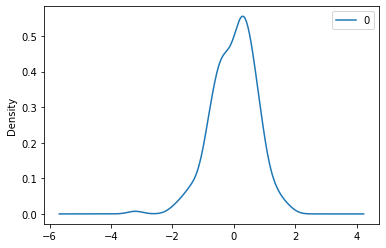

                0
count  221.000000
mean     0.006679
std      0.720555
min     -3.205528
25%     -0.425907
50%      0.099657
75%      0.479956
max      1.752574


In [0]:
model = ARIMA(moods, order=(2, 1, 1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted=7.130079, expected=7.000000
predicted=6.976554, expected=7.000000
predicted=6.994072, expected=8.000000
predicted=7.397270, expected=8.000000
predicted=7.453411, expected=8.000000
predicted=7.710696, expected=7.000000
predicted=7.236463, expected=8.000000
predicted=7.693263, expected=8.000000
predicted=7.592801, expected=7.000000
predicted=7.248708, expected=8.000000
predicted=7.633372, expected=7.000000
predicted=7.134273, expected=7.000000
predicted=7.225255, expected=8.000000
predicted=7.399625, expected=7.000000
predicted=7.109344, expected=7.000000
predicted=7.174450, expected=7.000000
predicted=6.945245, expected=7.000000
predicted=7.052808, expected=7.000000
predicted=6.946588, expected=7.000000
predicted=6.927082, expected=7.000000
predicted=6.973598, expected=7.000000
predicted=6.953188, expected=7.000000
predicted=6.953428, expected=6.000000
predicted=6.502585, expected=7.000000
predicted=6.869743, expected=7.000000
predicted=6.749872, expected=7.000000
predicted=6.

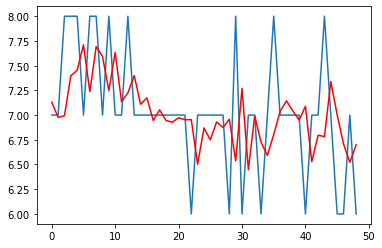

In [25]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

size = int(len(moods) * 0.80)

train, test = moods[0:size], moods[size:len(moods)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(8, 0, 0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()